# Introduction to GeoPanadas

A considerable proportion of the data generated every day is inherently spatial. From Earth Observation data and GPS data to data included in all kinds of maps, spatial data –also known sometimes as geospatial data or geographic information– are data for which a specific location is associated with each record. 


There are many tools suited for geospatial data science. In this notebook, we will focus on how to use the [GeoPandas](https://geopandas.org/en/v0.9.0/getting_started.html) library to work with geospatial data. We will learn how to read, write, and manipulate geospatial data using GeoPandas. We will also learn how to visualize geospatial data using GeoPandas, as well as some basic geospatial operations such as [spatial joins](https://geopandas.org/en/v0.9.0/docs/user_guide/mergingdata.html#spatial-joins).

## Basics of GeoPandas

GeoPandas, as its name suggests, is an extension of the [pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html) library that helps you work with geospatial data. 

The main data structures in geopandas are GeoSeries and GeoDataFrame which extend the capabilities of [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) and [DataFrames](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) from pandas.

The main difference between geodataframes and pandas dataframes is that a geodataframe should contain one column for geometries. By default, the name of this column is `'geometry'`, which contains the geometries (points, lines, polygons, multipolygons etc.).

[![image from Geopandas website](https://geopandas.org/en/v0.9.0/_images/dataframe.svg)](https://geopandas.org/en/v0.9.0/getting_started/introduction.html)





## Install Geopandas:

To avoid complexities, GeoPandas recommends installing the library using the conda package manager. 

```python
conda install geopandas

```

## Reading spatial data

To read spatial data, GeoPandas comes with the `geopandas.read_file()` function. This function can automatically read most of the occurring vector-based spatial data.

Some of the most common vector data formats are:

- **Shapefile**. As the industry standard, shapefiles are the most common vector data format.
- **GeoJSON**. It’s a newer format for geospatial data released in 2016. Unlike shapefiles, GeoJSON is a single file, making it easier to work with.


### Reading from a shapefile:
```python
import geopandas as gpd

gdf = gpd.read_file('path/to/shapefile.shp')


```


### Reading from a GeoJSON file:

```python
import geopandas as gpd

gdf = gpd.read_file('path/to/geojson.geojson')


```



As an example, let's load the boundaries for the City of Calgary which you can have access to it in the [City of Calgary Open Data Portal](https://data.calgary.ca/).

We have the data as shape file (.shp), so we only need to call the data:

In [67]:
# import GeoPandas
import geopandas as gpd


# reading the shapefile
boundary = gpd.read_file('City_Boundary.shp')


In [68]:
# display the type of the dataframe
type(boundary)

geopandas.geodataframe.GeoDataFrame

In [70]:
# display the first rows of the dataframe
boundary.head()

CITY  CREATED_DT                                           geometry
0  CALGARY  2023-10-02  POLYGON ((-114.01328 51.21243, -114.01327 51.2...

In [71]:
boundary.info() 

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CITY        1 non-null      object  
 1   CREATED_DT  1 non-null      object  
 2   geometry    1 non-null      geometry
dtypes: geometry(1), object(2)
memory usage: 156.0+ bytes


As we can see, the geometry column has Dtype of "geometry" which is a special data type in GeoPandas. It is used to store the spatial data. The geometry column contains the `polygon` data for each community district. The polygon data is used to draw the boundaries of the community districts on the map.

### Reading from a CSV file:

When reading from a CSV file, you need to create a GeoDataFrame from a DataFrame by specifying the `geometry` column.
Depending on your data, if you have a latitude and longitude column, you can create a geometry column from them using the `gpd.points_from_xy` function.
If you have a WKT column, you can create a geometry column from it using the `gpd.GeoDataFrame` function.
If you have line or polygon geometries, you can create a geometry column from them using the `gpd.GeoDataFrame` function.


For example, if you read a point CSV file with columns `lon` and `lat` and you want to create a GeoDataFrame from it, the geometry column can be created from `lon` and `lat` coordinates using the `gpd.points_from_xy` function.



```python
import geopandas as gpd

gdf = gpd.read_file('path/to/csv.csv')
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.lon, gdf.lat))

```

Now, let's imagine that we have a tex or csv file that includes points with latitude and longitude column. In this case, after loading the data, we have to define the geometry column from the latitude and longitude columns.

In this example, we are going to load the dataset of a list of COVID-19 and flu vaccination locations in Canada.

*([Link](https://data.calgary.ca/Health-and-Safety/Vaccination-Locations/9kkc-pfd6) to the dataset.)*

In [72]:
import geopandas as gpd

# reading the csv file
vaccination_location = gpd.read_file('Vaccination_Locations.csv')

Let's look at the data:


In [73]:
# display the top 3 rows of the dataframe
vaccination_location.head(3)

Address1 Address2         City         Phone VaccineType  \
0    104-375 ST. ALBERT TR             ST ALBERT  780-458-8000   ADULT XBB   
1  601-401 COOPERS BLVD SW               AIRDRIE  587-254-5810   ADULT XBB   
2        110-10 PELICAN PL           SYLVAN LAKE  403-864-5192   ADULT XBB   

      latitude     longitude Take Home Test Kits Antiviral Confirmed  \
0  53.64320444  -113.6226777                 YES                  NO   
1  51.25705871  -114.0210533                 YES                 YES   
2  52.29941313  -114.0959723                 YES                 YES   

                                         Title geometry  
0                             LONDON DRUGS #48     None  
1  SAVE-ON-FOODS PHARMACY #6603 - AIRDRIE WEST     None  
2                       PELICAN PLACE PHARMACY     None

As we can see, the geometry column contains None values. This is because the geometry column is empty and we need to fill it with the correct geometry values. We can do this by using the latitude and longitude columns to create a Point geometry.
We can use the following code to create a Point geometry from the latitude and longitude columns and fill the geometry column with the correct geometry values.



In [74]:

# create a geometry column
vaccination_location['geometry'] = gpd.points_from_xy(vaccination_location['longitude'], vaccination_location['latitude'])

# display the top 3 rows of the dataframe
vaccination_location.head(3)

Address1 Address2         City         Phone VaccineType  \
0    104-375 ST. ALBERT TR             ST ALBERT  780-458-8000   ADULT XBB   
1  601-401 COOPERS BLVD SW               AIRDRIE  587-254-5810   ADULT XBB   
2        110-10 PELICAN PL           SYLVAN LAKE  403-864-5192   ADULT XBB   

      latitude     longitude Take Home Test Kits Antiviral Confirmed  \
0  53.64320444  -113.6226777                 YES                  NO   
1  51.25705871  -114.0210533                 YES                 YES   
2  52.29941313  -114.0959723                 YES                 YES   

                                         Title                     geometry  
0                             LONDON DRUGS #48  POINT (-113.62268 53.64320)  
1  SAVE-ON-FOODS PHARMACY #6603 - AIRDRIE WEST  POINT (-114.02105 51.25706)  
2                       PELICAN PLACE PHARMACY  POINT (-114.09597 52.29941)

As we can see, the vaccination_location dataframe now has a geometry column that contains the Point objects. We can now convert the dataframe into a GeoDataFrame.

In [75]:
# convert the dataframe to a GeoDataFrame
vaccination_location = gpd.GeoDataFrame(vaccination_location, geometry='geometry')

# display the info of the geodataframe
vaccination_location.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Address1             188 non-null    object  
 1   Address2             188 non-null    object  
 2   City                 188 non-null    object  
 3   Phone                188 non-null    object  
 4   VaccineType          188 non-null    object  
 5   latitude             188 non-null    object  
 6   longitude            188 non-null    object  
 7   Take Home Test Kits  188 non-null    object  
 8   Antiviral Confirmed  188 non-null    object  
 9   Title                188 non-null    object  
 10  geometry             188 non-null    geometry
dtypes: geometry(1), object(10)
memory usage: 16.3+ KB


## Exploring GeoDataFrames

WE saw that the geometry column can contain any type of vector data, such as points, lines, and polygons. 

Another important feature of GeoDataFrames is that every geometry comes with associated CRS information. This CRS information tells GeoPandas where the coordinates are located on Earth. This information is key for spatial analysis. For example, if you need to combine two spatial datasets, you need to make sure they are expressed in the same CRS. Otherwise, you won’t get the result you expected.

There are two main categories of CRS:

- **Geographic coordinates**. They define a global position in degrees of latitude and longitude relative to the equator and the prime meridian. With this system, we can easily specify any location on earth. It is used widely, for example, in GPS. The most popular CRS is EPSG:4326, also called WGS84.

- **Projected coordinates**. While Earth is round, we usually represent it on a two-dimension map. Projected coordinates express locations in X and Y dimensions, thereby allowing us to work with a length unit, such as meters, instead of degrees, which makes the analysis more convenient and effective. However, moving from the three-dimensional Earth to a two-dimensional map will inevitably result in distortions. That’s why there are different approaches to creating projected coordinates. For example, many countries have adopted a standard projected CRS for their particular geography.

```{hint}
There’s much more about CRS, but it’s out of the scope of this tutorial. To find out additional information about projection and CRS you can take a look at [Geopandas documentation](https://geopandas.org/en/stable/docs/user_guide/projections.html).
```

In GeoPandas, the CRS information is stored in the crs attribute:

In [76]:
# get the crs of the boundary geodataframe
boundary.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

As we can see, the crs of the boundary geodataframe is 'Geographic 2D CRS: EPSG:4326'. 

Now let's see the crs of the vaccination_location geodataframe.

In [77]:
# get the crs of the vaccination_location geodataframe
vaccination_location.crs


We can see that the vaccination_location geodataframe does not have a crs. This is because the csv file does not contain the crs information. We can set the crs of the vaccination_location geodataframe to the crs of the boundary geodataframe using the `to_crs` method.
In this way, we can ensure that both the geodataframes have the same crs so that we can perform spatial operations such spatial join, overlay, etc.

In [78]:
# set the crs of the vaccination_location geodataframe to the crs of the boundary geodataframe
vaccination_location.crs = boundary.crs

#display the crs of the vaccination_location geodataframe
vaccination_location.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Now both dataframes have the same crs, we can proceed to the next steps.

### Plotting the geometries

It is always a good idea to plot the geometries to see if they are correctly placed on the map. We can use the plot() method to plot the geometries of the geodataframes.


<Axes: >

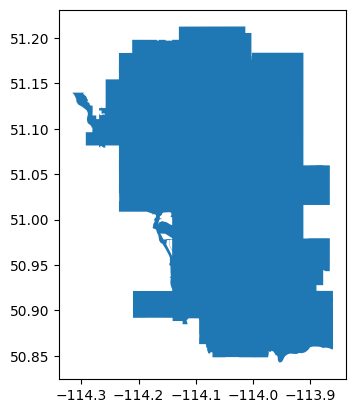

In [79]:

# plot the boundary geodataframe
boundary.plot()


<Axes: >

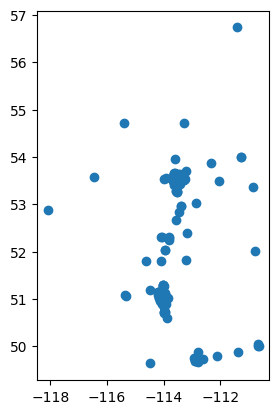

In [80]:
# plot the vaccination_location geodataframe
vaccination_location.plot()

In [90]:
# From previous turtoials, you are familiar with folium. Now, lets use folium to plot the boundary and vaccination_location geodataframes
import folium

# create a map object with Calgary latitude and longitude as the center

m = folium.Map(location=[51.0447, -114.0719], zoom_start=10)

# plot the boundary geodataframe
folium.GeoJson(boundary).add_to(m)

# plot the vaccination_location geodataframe
for idx, row in vaccination_location.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(m)
    
# display the map
m

## Spatial Relationships with GeoPandas


One of the key aspects of geospatial data is how they relate to each other in space. GeoPandas leverages the power of pandas and shapely packages to perform all kinds of spatial relationships between spatial datasets. In this section, we will cover some of the most common operations.

## Spatial Joins

Spatial joins allow the merging of two GeoDataFrames based on their spatial relationships. 

In GeoPandas, the spatial join operation is available as the `sjoin()` function. The first argument we specify is the GeoDataFrame to which we want to add information, and the second argument is the GeoDataFrame that contains the information we want to add. Then, we have to specify the type of join. Finally, the parameter “predicate” tells GeoPandas which spatial relationship we want to use to match both datasets. Some of the most common relationships *“intersects”*, *“contains”*, and *“within”*.

For example, let's say that we want to find the vaccination locations that are within the city boundary. We can use the sjoin method to perform a spatial join between the two geodataframes. The sjoin method will return a new geodataframe with the vaccination locations that are within the city boundary.

In [87]:
# perform a spatial join between the boundary and vaccination_location geodataframes
vaccination_location_within_boundary = gpd.sjoin(vaccination_location, boundary, predicate='within')

In [88]:
vaccination_location_within_boundary

Address1 Address2     City         Phone  \
5           113-5271 MEMORIAL DR SE           CALGARY  403-235-0081   
8          11-3735 RUNDLEHORN DR NE           CALGARY  403-798-9280   
15           850 SADDLETOWNE CIR NE           CALGARY  403-293-1670   
16        3130-11 ROYAL VISTA DR NW           CALGARY  403-800-6646   
25          400-1000 HAMPTONS DR NW           CALGARY  403-299-6715   
27            771 NORTH MOUNT DR NW           CALGARY  403-454-5244   
30           114-8180 MACLEOD TR SE           CALGARY  403-253-7383   
32            108-5401 TEMPLE DR NE           CALGARY  403-460-0303   
35                 32-4604 37 ST SW           CALGARY  825-210-9716   
36             4-7930 BOWNESS RD NW           CALGARY  403-288-4041   
37           356-100 ANDERSON RD SE           CALGARY  403-271-7877   
41                     860 13 ST SE           CALGARY  587-480-0178   
47                     1711 4 ST SW           CALGARY  403-228-5067   
48          11-600 CROWFOOT CRES NW           CALGARY  403-455-9939   
51                  2079 146 AVE SE           CALGARY  403-278-1565   
58                 240-520 3 AVE SW           CALGARY  403-454-4412   
65               8855 MACLEOD TR SW           CALGARY  403-640-7617   
66                   1219 11 AVE SW           CALGARY  587-392-5857   
73              7-2111 CENTRE ST NW           CALGARY  403-276-7076   
81           159 MAHOGANY CENTRE SE           CALGARY  403-299-5808   
83          7048-2060 SYMONS VALLEY  PKWY NW  CALGARY  403-266-1450   
90             4122 BRENTWOOD RD NW           CALGARY  403-299-4308   
97           109-5809 MACLEOD TR SW           CALGARY  403-460-3825   
102              78-4307 130 AVE SE           CALGARY  403-475-8612   
106               100-2675 36 ST NE           CALGARY  403-291-0076   
110     114-10325 BONAVENTURE DR SE           CALGARY  403-271-8160   
111              103A-3009 14 ST SW           CALGARY  403-764-3080   
114                 4700 130 AVE SE           CALGARY  403-257-6530   
122          101-83 DEERPOINT RD SE           CALGARY  587-554-5588   
125            200 STEWART GREEN SW           CALGARY  403-246-0336   
129       100-250 SHAWVILLE BLVD SE           CALGARY  403-299-4439   
131           9-15 MILLRISE BLVD SW           CALGARY  587-329-5858   
141            128-6707 ELBOW DR SW           CALGARY  403-259-6893   
145                7-1603 62 AVE SE           CALGARY  587-391-9878   
149          9-728 NORTHMOUNT DR NW           CALGARY  403-289-9181   
152                104-305 10 ST NW           CALGARY  825-540-1500   
156             4940 RICHMOND RD SW           CALGARY  403-299-4487   
158        110-8500 BLACKFOOT TR SE           CALGARY  403-253-5700   
161              105-4411 16 AVE NW           CALGARY  403-247-9502   
162  125-8888 COUNTRY HILLS BLVD NW           CALGARY  403-239-7455   
164                  2790 32 AVE NE           CALGARY  403-453-2443   
169               700-2220 68 ST NE           CALGARY  403-299-2612   
173               6213 CENTRE ST NW           CALGARY  403-274-2444   
178                  1010 1 AVE  NE           CALGARY  403-269-6440   
184            4501 BRISEBOIS DR NW           CALGARY  403-282-1208   
185        100-5005 DALHOUSIE DR NW           CALGARY  403-202-0444   
186                    2303 4 ST SW           CALGARY  403-229-3458   
187            28 PANATELLA BLVD NW           CALGARY  403-460-6707   

    VaccineType     latitude     longitude Take Home Test Kits  \
5                51.05308993  -113.9562593                 YES   
8     ADULT XBB  51.07151283    -113.97887                 YES   
15               51.12375399  -113.9447021                 YES   
16    ADULT XBB   51.1500556  -114.2064574                  NO   
25    ADULT XBB  51.14347029  -114.1295243                 YES   
27    ADULT XBB  51.08260367  -114.0959373                 YES   
30    ADULT XBB  50.98199571  -114.0703651                 YES   
32    ADULT XBB   5

In [91]:
# plot the new vaccination_location_within_boundary geodataframe and the boundary geodataframe with folium

# create a map object with Calgary latitude and longitude as the center
m = folium.Map(location=[51.0447, -114.0719], zoom_start=10)

# plot the boundary geodataframe
folium.GeoJson(boundary).add_to(m)

# plot the vaccination_location_within_boundary geodataframe
for idx, row in vaccination_location_within_boundary.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(m)
    
# display the map
m

As we can see, the vaccination_location_within_boundary geodataframe contains the vaccination locations that are within the boundary of Calgary. We can now use this geodataframe to find the vaccination locations within Calgary.
the spatial join operation is a very useful operation in geospatial analysis. It can be used to find the points that are within a polygon, the polygons that intersect with another polygon, and many other spatial operations.

## Summary

I hope you enjoyed this GeoPandas tutorial. Spatial analysis is one of the coolest domains in data science, providing endless opportunities to enrich your analysis with location-based information. There are many tools for spatial analysis, but if you’re already familiar with Python, GeoPandas is a great place to get started.